<a href="https://colab.research.google.com/github/hope04302/freeSearch/blob/main/commonAI/nsmcTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 실험 1 (5.24.)

- 본격적인 실험에 앞서, 데이터셋 분석

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

In [36]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in train_text.split('\n')[1:] if row.count('\t') > 0])

test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

for i in range(10):
    print(train_text_x[i], train_y[i])

아 더빙.. 진짜 짜증나네요 목소리 [1 0]
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나 [0 1]
너무재밓었다그래서보는것을추천한다 [1 0]
교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정 [1 0]
사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다 [0 1]
막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움. [1 0]
원작의 긴장감을 제대로 살려내지못했다. [1 0]
별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네 [1 0]
액션이 없는데도 재미 있는 몇안되는 영화 [0 1]
왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나? [0 1]


악플, 선플 수 비교

In [37]:
print(np.sum(train_y, axis=0), np.sum(test_y, axis=0))

[75173 74827] [24827 25173]


쓰여있는 단어 분석

In [38]:
words = set()
for i in train_text_x:
    words |= set(i)
print(len(words))
print(words)

3004
{'럤', '헐', '봇', '셸', '쀼', '찿', '맠', '똭', '훕', '광', '갘', '든', '쥣', '짤', '볻', '쫌', '쏴', '놨', 'そ', '썱', '됑', '촤', '즤', '콴', '껬', '샹', '갰', '퓌', '定', '빳', '홱', '앟', '셑', 'G', '밭', '↓', '맸', '갉', '곻', '좊', '뮈', '치', '맜', '횔', '췃', '존', '둔', '롯', '잼', '댑', '팡', '꺤', '벌', '뵙', '떈', '일', '렬', '끗', '싑', '려', '숭', '쒜', 'g', '읍', '쥴', '펑', '룽', '톱', '꿇', '멸', '알', ' ', '윈', '最', '꿍', '맞', '녿', '깞', '老', '8', 'N', '윽', '앰', '祖', '부', '톡', '늡', 'ㅄ', '범', '씻', '信', '핓', '삔', '훸', '갖', '퐛', '힉', '봄', '→', '응', 'ㅕ', '땋', '쳫', '밫', '훤', '佑', '팔', 'ㅠ', '숍', '욈', '웜', '뵛', '징', '켯', '안', '숫', '햐', '빙', 'た', '밬', '햏', '핧', '값', '쨈', '됫', 'も', 'リ', '뗴', '넒', 'の', '팜', '뚝', '륨', '닁', '체', '숙', '맘', '윖', '後', '런', '뿐', '탆', '첩', '퉤', '불', '련', '꼭', '峽', '혔', '꽉', '깼', '굉', '핦', '팩', '져', '픕', '+', '憎', '뭨', '럈', '꼅', '옳', '섀', '÷', '씝', '월', "'", '믐', '쭘', 'ゃ', 'ㅂ', '좡', '색', '뱀', '싷', '푸', '붹', '엑', '증', '@', '헠', '걔', '웃', '빤', '딴', '믄', '율', '쿈', '곽', '궅', '줫', '춥', '곱', '젆', '낔', '쑴', '뵤', '失', '찯',

## 실험 2

5월 24일
- 문제: loss, accuracy가 훈련 데이터에서 안 변함.

5월 --
- 음절 단위로 토큰화, 3000 이내 글자 제외하고는 `<unk>`로 처리.
- 시작부분이 `<st>`, 문장 끝마다 `<ed>` 추가, 띄어쓰기 무시
- 160자를 기준으로 뒤에 패딩(왜냐하면, 최대 길이가 160자 이내)
- 모델은 아래와 같음

```
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 300, input_length=160),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

```

> 참고:
>
> 처음에는 kss를 쓸려고 했는데 너무 느려서 바꿈
>
> 140자는 제대로 학습 X (50% accuracy, 0.6 loss 에서 변경 무)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

In [3]:
%%bash
pip install kiwipiepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.15.0-py3-none-any.whl size=30602629 sha256=0998844484ddfcda573fda473f2c3931820feab711fca4f27a6b4a3cb471d414
  Stored in directory: /root/.cache/pip/wheels/f3/55/41/ca474338ece1bc4314b01445f64ff002d71e19df45575a16e2
Successfully built kiwipiepy-model


In [4]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in train_text.split('\n')[1:] if row.count('\t') > 0])

test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_y = np.array([[0, 1] if int(row.split('\t')[2]) else [1, 0] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(len(train_y), len(test_y))

4893335/4893335 [==============================] - 0s 0us/step
150000 50000


In [5]:
import re
from kiwipiepy import Kiwi

kiwi = Kiwi()

def edit_str_21(text):

    def edit(string):
        splited = kiwi.split_into_sents(string)
        res = ['<st>']
        for sent in splited:
            sent = sent.text
            sent = re.sub(r"""[ ]""", "", sent)

            res.extend(sent)
            res.append('<ed>')
        return res
    
    return [edit(string) for string in text]

train_sentences = edit_str_21(train_text_x)
test_sentences = edit_str_21(test_text_x)
for i in train_sentences[:10]:
    print(i)

['<st>', '아', '더', '빙', '.', '.', '<ed>', '진', '짜', '짜', '증', '나', '네', '요', '<ed>', '목', '소', '리', '<ed>']
['<st>', '흠', '.', '.', '.', '<ed>', '포', '스', '터', '보', '고', '초', '딩', '영', '화', '줄', '.', '.', '.', '.', '<ed>', '오', '버', '연', '기', '조', '차', '가', '볍', '지', '않', '구', '나', '<ed>']
['<st>', '너', '무', '재', '밓', '었', '다', '<ed>', '그', '래', '서', '보', '는', '것', '을', '추', '천', '한', '다', '<ed>']
['<st>', '교', '도', '소', '이', '야', '기', '구', '먼', '.', '.', '<ed>', '솔', '직', '히', '재', '미', '는', '없', '다', '.', '.', '<ed>', '평', '점', '조', '정', '<ed>']
['<st>', '사', '이', '몬', '페', '그', '의', '익', '살', '스', '런', '연', '기', '가', '돋', '보', '였', '던', '영', '화', '!', '<ed>', '스', '파', '이', '더', '맨', '에', '서', '늙', '어', '보', '이', '기', '만', '했', '던', '커', '스', '틴', '던', '스', '트', '가', '너', '무', '나', '도', '이', '뻐', '보', '였', '다', '<ed>']
['<st>', '막', '걸', '음', '마', '뗀', '3', '세', '부', '터', '초', '등', '학', '교', '1', '학', '년', '생', '인', '8', '살', '용', '영', '화', '.', 'ㅋ', 'ㅋ', 'ㅋ', '<ed>', '.', '.', '.',

최대 길이 확인

In [6]:
maximum = 0
for i in train_sentences:
    maximum = max(len(i), maximum)
print(maximum)

149


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(train_sentences)

train_x = tokenizer.texts_to_sequences(train_sentences)
train_x = pad_sequences(train_x, padding='post', maxlen=160)  # padding='pre': 앞에 패딩 추가
test_x = tokenizer.texts_to_sequences(test_sentences)
test_x = pad_sequences(test_x, padding='post', maxlen=160)  # padding='pre': 앞에 패딩 추가

print(train_x[:5])
print(train_y[:5])

[[   3   14   95  535    2    2    1   55   85   85  322   16   53   32
     1  330  105   25    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   3  708    2    2    2    1  205   39  147   19    7  276  388   10
     9  222    2    2    2    2    1   76  190   62   17  157  251   11
   798    8  119  100   16    1

In [ ]:
def f1_score(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision*recall)/(precision+recall + tf.keras.backend.epsilon())
    return f1_val

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, 300, input_length=160),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=100, batch_size=64, validation_split=0.2)
# , callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

Epoch 1/100
1875/1875 [==============================] - 41s 21ms/step - loss: 0.6934 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 2/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6933 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 3/100
1875/1875 [==============================] - 20s 11ms/step - loss: 0.6933 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 4/100
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 5/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5027
Epoch 6/100
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 7/100
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0

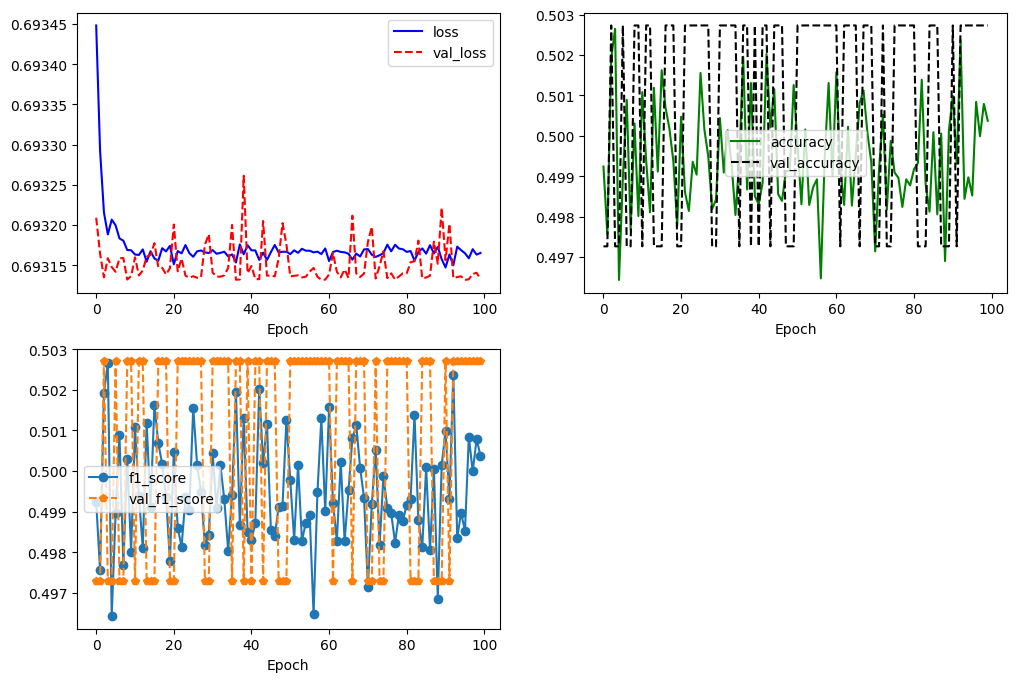

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history.history['f1_score'], 'o-', label='f1_score')
plt.plot(history.history['val_f1_score'], 'p--', label='val_f1_score')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [10]:
model.evaluate(test_x, test_y, verbose=0)

[0.6931948661804199, 0.49654000997543335, 0.4965410530567169]

In [11]:
for i in range(20):
    print(test_text_x[i], test_y[i])
    print(model.predict(test_x[i:i + 1], verbose=0)[0])

굳 ㅋ [0 1]
[0.50502163 0.49497843]
GDNTOPCLASSINTHECLUB [1 0]
[0.50502163 0.49497843]
뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아 [1 0]
[0.50502163 0.49497843]
지루하지는 않은데 완전 막장임... 돈주고 보기에는.... [1 0]
[0.50502163 0.49497843]
3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠?? [1 0]
[0.50502163 0.49497843]
음악이 주가 된, 최고의 음악영화 [0 1]
[0.50502163 0.49497843]
진정한 쓰레기 [1 0]
[0.50502163 0.49497843]
마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다 [1 0]
[0.50502163 0.49497843]
갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다 [1 0]
[0.50502163 0.49497843]
이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네.. [0 1]
[0.50502163 0.49497843]
괜찮네요오랜만포켓몬스터잼밌어요 [0 1]
[0.50502163 0.49497843]
한국독립영화의 한계 그렇게 아버지가 된다와 비교됨 [1 0]
[0.50502163 0.49497843]
청춘은 아름답다 그 아름다움은 이성을 흔들어 놓는다. 찰나의 아름다움을 잘 포착한 섬세하고 아름다운 수채화같은 퀴어영화이다. [0 1]
[0.50502163 0.49497843]
눈에 보이는 반전이었지만 영화의 흡인력은 사라지지 않았다. [0 1]
[0.50502163 0.49497843]
"""스토리, 연출, 연기, 비주얼 등 영화의 기본 조차 안된 영화에 무슨 평을 해. 이런 영화 찍고도 김문옥 감독은 """"내가 영화 경력이 몇OO인데 조무래기들이

테스트

In [12]:
SENT = '''사람들이 쓰레기를 쓰레기통에 버렸다'''

# 가공
lst_one = edit_str_21(SENT)
lst = [SENT[:i + 1] for i in range(len(SENT))]
lst = tokenizer.texts_to_sequences(lst)
lst = pad_sequences(lst, padding='post', maxlen=140)  # padding='pre': 앞에 패딩 추가

for i, j in zip(lst, lst_one):
    print(j, model.predict(np.array([i]), verbose=0)[0][1])

['<st>', '사', '<ed>'] 0.49497843
['<st>', '람', '<ed>'] 0.49497843
['<st>', '들', '<ed>'] 0.49497843
['<st>', '이', '<ed>'] 0.49497843
['<st>'] 0.49497843
['<st>', '쓰', '<ed>'] 0.49497843
['<st>', '레', '<ed>'] 0.49497843
['<st>', '기', '<ed>'] 0.49497843
['<st>', '를', '<ed>'] 0.49497843
['<st>'] 0.49497843
['<st>', '쓰', '<ed>'] 0.49497843
['<st>', '레', '<ed>'] 0.49497843
['<st>', '기', '<ed>'] 0.49497843
['<st>', '통', '<ed>'] 0.49497843
['<st>', '에', '<ed>'] 0.49497843
['<st>'] 0.49497843
['<st>', '버', '<ed>'] 0.49497843
['<st>', '렸', '<ed>'] 0.49497843
['<st>', '다', '<ed>'] 0.49497843
